# <font color="red">**Progetto: Un modello di previsione per il mercato immobiliare**</font>
## <font color="orange">**Studente: Giacomo Latini**</font>
## <font color="orange">**Master in AI Engineering**</font>

## <font color="orange">**Requisiti**</font>

RealEstateAI Solutions si propone di ottimizzare la valutazione dei prezzi immobiliari attraverso l'uso di tecniche avanzate di regolarizzazione in modelli di regressione lineare. L'obiettivo è fornire previsioni di prezzo più accurate e affidabili, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione del modello.

Nel settore immobiliare, ottenere stime precise dei prezzi delle proprietà è cruciale per prendere decisioni informate. Tuttavia, i modelli di regressione lineare tradizionali possono soffrire di overfitting, compromettendo l'accuratezza delle previsioni. È necessario esplorare metodi di regolarizzazione efficaci per migliorare le performance predittive e gestire la complessità del modello.

Implementando e confrontando metodi di regolarizzazione come Lasso, Ridge e Elastic Net, RealEstateAI Solutions offrirà un sistema in grado di fornire previsioni di prezzo immobiliari più accurate e stabili. Questo permetterà agli agenti immobiliari e agli investitori di prendere decisioni basate su dati più affidabili, aumentando la loro competitività nel mercato.

**Requisiti del Progetto**:

1. **Preparazione del Dataset**:
* Caricamento e preprocessamento dei dati sui prezzi immobiliari.
* Gestione dei valori mancanti, codifica delle variabili categoriche e normalizzazione/scalatura dei dati.
2. **Implementazione dei Modelli di Regressione**:
* **Ridge Regression**: Implementazione e addestramento del modello con regolarizzazione Ridge.
* **Lasso Regression**: Implementazione e addestramento del modello con regolarizzazione Lasso.
* **Elastic Net Regression**: Implementazione e addestramento del modello con regolarizzazione Elastic Net.
3. **Valutazione delle Performance**:
* Utilizzo di tecniche di validazione incrociata.
* Calcolo del Mean Squared Error (MSE) per ciascun modello.
* Confronto della complessità dei modelli valutando il numero di coefficienti non nulli.
* Analisi e confronto dei risultati dei vari metodi di regolarizzazione.
4. **Visualizzazione dei Risultati**:
* Creazione di grafici per visualizzare e confrontare le performance dei modelli.
* Visualizzazione della distribuzione dei residui per valutare l'adeguatezza del modello.

Il progetto deve includere il codice sorgente completo, con commenti dettagliati che spiegano i vari passaggi, le scelte fatte e i risultati ottenuti, per garantire trasparenza e replicabilità del lavoro.

### <font color="yellow">**Dataset**</font>

Il dataset è disponibile qui: https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv (liberamente tratto dal seguente dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

* Price: il prezzo, il target da prevedere
* Area: superficie dell’immobile
* Bedrooms: numero di camere da letto
* Bathrooms: numero di bagni
* Stories: numero di piani
* Mainroad: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti
* guestroom: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti
* basement: vale 1 se l’immobile ha un seminterrato, 0 altrimenti
* hotwaterheating: vale 1 se l’immobile ha una caldaia, 0 altrimenti
* airconditioning: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti
* parking: numero di parcheggi
* prefarea: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti
* Furnishingstatus: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato

## <font color="orange">**Soluzione**</font>

### <font color="yellow">**Import**</font>

Importazione delle librerie(+ eventuali moduli) con relative classi e funzioni

In [1]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### <font color="yellow">**Preparazione del dataset**</font>

Caricamento del dataset chiamato housing.csv tramite la funzione read_csv della libreria Pandas, dove:
* la variabile price è la variabile target (variabile dipendente)
* tutte le altre variabili rappresentano le features (variabili indipendenti)

In [2]:
BASE_PATH = "https://proai-datasets.s3.eu-west-3.amazonaws.com/"

df_housing = pd.read_csv(BASE_PATH+"housing.csv")
print(df_housing.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 1  
1                 1  
2                 2  
3                 1  
4                 1  


Tramite la funzione info() si è potuto notare che non si dovrà applicare nessuna operazione di feature encoding (come Label Encoding e/o One-Hot Encoding), poichè si hanno tutte variabili quantitative e nessuna variabile qualitativa

In [3]:
print(df_housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB
None


Verifica di eventuali valori mancanti tramite la funzione isna(), dove si può notare che il risultato è pari a 0 su tutte le colonne, confermando che nel dataset non ci sono valori mancanti e quindi non si ha bisogno di applicare imputazione oppure rimozione di righe/colonne

In [4]:
print(df_housing.isna().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Una volta caricato il dataset, andiamo a selezionare con le variabili X e y:
* X -> features (array numpy bidimensionale)
* y -> targets (array numpy monodimensionale)

In [5]:
# rimozione della variabile target price e conversione del dataframe in un array numpy bidimensionale
X = df_housing.drop("price", axis=1).values
# dalla series con la variabile target price, conversione in array numpy monodimensionale
y = df_housing["price"].values

In [6]:
print(f"shape di X: {X.shape}")
print(f"shape di y: {y.shape}")

shape di X: (545, 12)
shape di y: (545,)


### <font color="yellow">**Cross Validation (Hold-Out) e Standardizzazione**</font>

Applicazione della tecnica di Cross Validation, Hold-Out, per partizionare il dataset in due set, utilizzando la funzione train_test_split del modulo sklearn.model_selection, con:
* X_train, X_test: insieme delle features per l'addestramento e test, con il 70% di samples
* y_train, y_test: insieme di targets per l'addestramento e test, con il 30% di samples

In [7]:
# costante che verrà associata al parametro random_state, per il numero di dati riproducibili
RANDOM_SEED = 0

# parametri della funzione train_test_split:
# X->insieme delle features, y->insieme di targets, test_size=0.3->percentuale di pesi (30%) che si vogliono associare al test_set, random_state=RANDOM_SEED(=0)->numero di dati riproducibili
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [8]:
print(f"shape delle features, per il set di addestramento: {X_train.shape}")
print(f"shape dei targets, per il set di addestramento: {y_train.shape}")
print(f"shape delle features, per il set di test: {X_test.shape}")
print(f"shape dei targets, per il set di test: {y_test.shape}")

shape delle features, per il set di addestramento: (381, 12)
shape dei targets, per il set di addestramento: (381,)
shape delle features, per il set di test: (164, 12)
shape dei targets, per il set di test: (164,)


Applicazione della Standardizzazione sulle features dei set di addestramento e test

In [9]:
# istanziazione dell'oggetto ss, della classe StandardScaler()
ss = StandardScaler()
# sulle features del set di train, calcolo dei parametri per la trasformazione (fit) e applicazione della standardizzazione (transform), portandole ad avere media 0 e deviazione standard 1
X_train = ss.fit_transform(X_train)
# sulle features del set di test, solo applicazione della standardizzazione (transform), poichè il calcolo dei parametri lo si effettua solo sulle features del set di addestramento
X_test = ss.transform(X_test)

### <font color="yellow">**Implementazione dei Modeli di Regressione: Lasso (L1), Ridge (L2) ed Elastic Net (L1+L2); Calcolo dei coefficienti non nulli; Valutazione delle performance tramite MSE ed $R^2$**</font>

La funzione number_of_non_zero_coefficients è stata applicata ai modelli di regressione Ridge, Lasso ed Elastic Net per determinare il numero di coefficienti non nulli. Essa utilizza il metodo count_nonzero di NumPy sull’attributo coef_ del modello, conteggiando i coefficienti diversi da zero

In [10]:
def number_of_non_zero_coefficients(model):

  """
  Restituisce il numero di coefficienti non nulli in un modello di regressione

  Parametri:
    - model (object): modello di regressione Ridge, Lasso o Elastic Net

  Output: Numero di coefficienti diversi da zero
  """

  n_non_zero = np.count_nonzero(model.coef_)
  print(f"Numero di coefficienti non nulli: {n_non_zero}")

La funzione evaluate_model è stata applicata ai modelli di regressione Ridge, Lasso ed Elastic Net per effettuare la previsione sui dati e valutarne le performance attraverso il calcolo del Mean Squared Error (MSE) e del coefficiente di determinazione $R^2$

In [11]:
def evaluate_model(model, dataset):

  """
  Restituisce le performance di un modello di regressione tramite MSE e R^2

  Parametri:
    - model (object): modello di regressione Ridge, Lasso o Elastic Net
    - dataset (tuple): tupla (X, y) contenente le features e il target del set di train o test

  Output: Valutazione del modello tramite MSE e R^2, dopo previsione dei dati
  """

  # estrazione delle features (X) e del target (y)
  X, y = dataset
  # predizione dei valori tramite il modello
  y_pred = model.predict(X)

  # valutazione del modello tramite MSE
  print(f"MSE: {mean_squared_error(y, y_pred):.3f}")
  # valutazione del modello tramite R^2
  print(f"R^2: {r2_score(y, y_pred):.3f}")

#### <font color="green">**Ridge (L2)**</font>

La classe RidgeCV (Ridge Cross Validation), che integra una procedura di selezione automatica del parametro alpha tramite k-fold cross-validation, con un numero di batch (di default) pari a k=5, ha indicato come valore ottimale del parametro di regolarizzazione: 10.0, senza annullare alcun coefficiente

In [12]:
# lista con i valori per il parametro di regolarizzazione da valutare
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1., 10., 100., 1000., 10000., 1e5, 1e6]

# istanziazione dell'oggetto ridge, della classe RidgeCV
# parametri: alphas->lista con i valori per il parametro di regolarizzazione da valutare, cv=5->numero di batch
ridge = RidgeCV(alphas=alpha_list, cv=5)
# addestramento del modello, con i dati del set di train
ridge.fit(X_train, y_train)
print(f"Valore ottimale di alpha: {ridge.alpha_}\n")
print(f"Coefficienti del modello: {ridge.coef_}")

Valore ottimale di alpha: 10.0

Coefficienti del modello: [481824.46537261 103679.78904274 452111.72198667 366617.96771149
 173046.05359057 159573.61214847 164926.70835233 252478.055286
 430543.28964408 203433.85119918 296944.13061673 148672.84969269]


In [13]:
# istanziazione dell'oggetto ridge, della classe Ridge, con parametro di regolarizzazione lambda pari a 10.0
ridge = Ridge(alpha=10.)
# addestramento del modello, sul set di train
ridge.fit(X_train, y_train)

Ridge(alpha=10.0)

Dai risultati della Regressione Ridge (L2) possiamo notare che:
* Il coefficiente di determinazione $R^2$ è maggiore sul test e questo significa che c'è una buona generalizzazione, senza nessun segno di overfitting
* I coefficienti sono tutti mantenuti, dato che Ridge non azzera i coefficienti a 0

NB: Una volta eseguito la funzione evaluate_model, si può notare che i valori del MSE risultano elevati a causa dell'unità di misura della variabile target price, espressa in milioni. L’MSE, infatti, eleva al quadrato gli errori, amplificando ulteriormente le unità di misura

In [14]:
# calcolo dei coefficienti non nulli, in fase di train
number_of_non_zero_coefficients(ridge)
# valutazione del modello, in fase di train
evaluate_model(ridge, (X_train, y_train))

Numero di coefficienti non nulli: 12
MSE: 1205382268601.551
R^2: 0.656


In [15]:
# valutazione del modello, in fase di test
evaluate_model(ridge, (X_test, y_test))

MSE: 958023427085.297
R^2: 0.724


#### <font color="green">**Lasso (L1)**</font>

La classe LassoCV (Lasso Cross Validation), che integra una selezione automatica di alpha tramite k-fold cross-validation, con un numero di batch (di default) pari a k=5, ha individuato come valore ottimale per il parametro di regolarizzazione: 0.0001. Il fatto che tutti i coefficienti siano rimasti attivi potrebbe indicare che tutte le variabili contribuiscono alla previsione, o che esiste una forte collinearità tra esse

In [16]:
# lista con i valori per il parametro di regolarizzazione da valutare
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1., 10., 100., 1000., 10000., 1e5, 1e6]

# istanziazione dell'oggetto lasso, della classe LassoCV
# parametri: alphas->lista con i valori per il parametro di regolarizzazione da valutare, cv=5->numero di batch
lasso = LassoCV(alphas=alpha_list, cv=5)
# addestramento del modello, con i dati del set di train
lasso.fit(X_train, y_train)
print(f"Valore ottimale di alpha: {lasso.alpha_}\n")
print(f"Coefficienti del modello: {lasso.coef_}")

Valore ottimale di alpha: 0.0001

Coefficienti del modello: [491162.12711856  95926.91344383 460222.86460865 374035.90466128
 172993.34337347 158660.99538363 168753.48858347 260698.29754991
 438799.78435706 202056.71449982 300454.50608135 150374.47592137]


In [17]:
# istanziazione dell'oggetto lasso, della classe Lasso, con parametro di regolarizzazione lambda pari a 0.0001
lasso = Lasso(alpha=0.0001)
# addestramento del modello, sul set di train
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

Il modello Lasso, con alpha=0.0001, ha restituito performance molto simili al modello Ridge, sia sul set di addestramento che su quello di test. Nessuna variabile è stata esclusa, suggerendo che tutte le features sono rilevanti per la predizione

NB: Una volta eseguito la funzione evaluate_model, si può notare che i valori del MSE risultano elevati a causa dell'unità di misura della variabile target price, espressa in milioni. L’MSE, infatti, eleva al quadrato gli errori, amplificando ulteriormente le unità di misura

In [18]:
# calcolo dei coefficienti non nulli, in fase di train
number_of_non_zero_coefficients(lasso)
# valutazione del modello, in fase di train
evaluate_model(lasso, (X_train, y_train))

Numero di coefficienti non nulli: 12
MSE: 1204930725280.426
R^2: 0.656


In [19]:
# valutazione del modello, in fase di test
evaluate_model(lasso, (X_test, y_test))

MSE: 961887082171.490
R^2: 0.723


#### <font color="green">**Elastic Net (L1+L2)**</font>

La classe ElasticNetCV (ElasticNet Cross Validation) impiega una k-fold cross-validation, con un numero di batch (di default) pari a k=5, per selezionare i valori ottimali di alpha e l1_ratio. Il modello ha scelto alpha=0.1 e l1_ratio=0.1, indicando una penalizzazione ibrida prevalentemente Ridge (90%) e parzialmente Lasso (10%). Nessun coefficiente è stato annullato, suggerendo che tutte le variabili contribuiscono alla predizione

In [20]:
# lista con i valori per il parametro di regolarizzazione da valutare
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1., 10., 100., 1000., 10000., 1e5, 1e6]
# lista con i valori del l1_ratio da valutare
l1_ratio_list = [.1, .5, .7, .9, .95, .99, 1]

# istanziazione dell'oggetto elastic_net, della classe ElasticNetCV
# parametri: alphas->lista con i valori per il parametro di regolarizzazione da valutare, l1_ratio->controlla il bilanciamento tra regolarizzazione L1 (Lasso) e L2 (Ridge), cv=5->numero di batch
elastic_net = ElasticNetCV(alphas=alpha_list, l1_ratio=l1_ratio_list, cv=5)
# addestramento del modello, con i dati del set di train
elastic_net.fit(X_train, y_train)
print(f"Valore ottimale di alpha: {elastic_net.alpha_}\n")
print(f"Valore ottimale di l1_ratio: {elastic_net.l1_ratio_}\n")
print(f"Coefficienti del modello: {elastic_net.coef_}")

Valore ottimale di alpha: 0.1

Valore ottimale di l1_ratio: 0.1

Coefficienti del modello: [461346.60496453 118884.448709   434029.82452816 350716.37477625
 172464.48901869 160688.26340074 157131.81860616 234695.06681529
 412057.81067882 205507.87272997 288677.14936352 144814.43029868]


In [21]:
# istanziazione dell'oggetto elastic_net, della classe ElasticNet, con parametro di regolarizzazione lambda ed l1_ratio pari a 0.1
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.1)
# addestramento del modello, sul set di train
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

Il modello Elastic Net, con alpha=0.1 e l1_ratio=0.1, ha ottenuto i risultati migliori sul test set, con un un coefficiente di determinazione $R^2$ pari a 0.725 e l’MSE più basso tra i modelli testati. Nessuno dei modelli ha eliminato features, confermando che tutte le variabili hanno un contributo significativo nella stima del prezzo degli immobili

NB: Una volta eseguito la funzione evaluate_model, si può notare che i valori del MSE risultano elevati a causa dell'unità di misura della variabile target price, espressa in milioni. L’MSE, infatti, eleva al quadrato gli errori, amplificando ulteriormente le unità di misura

In [22]:
# calcolo dei coefficienti non nulli, in fase di train
number_of_non_zero_coefficients(elastic_net)
# valutazione del modello, in fase di train
evaluate_model(elastic_net, (X_train, y_train))

Numero di coefficienti non nulli: 12
MSE: 1209681155174.528
R^2: 0.655


In [23]:
# valutazione del modello, in fase di test
evaluate_model(elastic_net, (X_test, y_test))

MSE: 953769680424.376
R^2: 0.725


### <font color="yellow">**Visualizzazione dei Risultati**</font>

##### <font color="green">**Creazione di grafici per visualizzare e confrontare le performance dei modelli: Learning Curve**</font>

Per valutare le performance di un modello su insiemi di addestramento di dimensioni crescenti, è stata utilizzata la funzione learning_curve del modulo sklearn.model_selection. Essa consente di analizzare l’andamento degli errori di addestramento e validazione al variare della quantità di dati, fornendo così una curva di apprendimento utile per diagnosticare overfitting o underfitting. Restituisce tre elementi fondamentali:
* train_sizes_abs (di tipo: numpy.ndarray): Numero di esempi di addestramento utilizzati per generare la curva di apprendimento
* train_scores (di tipo: numpy.ndarray): Punteggi sui set di addestramento
* test_scores (di tipo: numpy.ndarray): Punteggi sui set di test

In [24]:
def plot_learning_curve(model, dataset, random_state):

  """
  Genera la curva di apprendimento di un modello di regressione (Ridge, Lasso o Elastic Net).

  Parametri:
    - model (object): modello di regressione Ridge, Lasso o ElasticNet
    - dataset (tuple): tupla contenente (X, y) dove X sono le features e y il target
    - random_state (int): seed per garantire la riproducibilità

  Output: Visualizzazione del grafico della learning curve (score di addestramento e validazione)
  """

  # estrazione delle features (X) e del target (y)
  X, y = dataset

  # calcolo della learning curve con cross-validation
  # la funzione learning_curve ha come parametri: metodo di regolarizzazione non filtrato, dati per l'addestramento (X, y) e random_state=0 per il numero di dati riproducibili
  train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, random_state=random_state)

  # applicazione temporanea dello stile grafico della libreria seaborn, tramite keyword with e valori di default dei parametri della funzione set_theme
  with sns.axes_style("darkgrid"), sns.plotting_context("notebook"), sns.color_palette("deep"):
    plt.plot(train_sizes_abs, train_scores.mean(axis=1), label="Train score")
    plt.plot(train_sizes_abs, test_scores.mean(axis=1), label="Test score")
    plt.legend()
    plt.show()

I grafici relativi ai modelli Ridge, Lasso ed Elastic Net mostrano iniziali segni di overfitting, progressivamente ridotti con l’aumento della dimensione del dataset, migliorando così la capacità di generalizzazione del modello

##### <font color="white">**Ridge (L2)**</font>

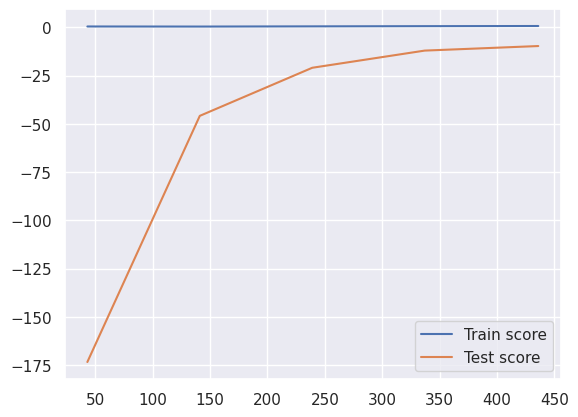

In [25]:
plot_learning_curve(Ridge(alpha=10.), (X, y), RANDOM_SEED)

##### <font color="white">**Lasso (L1)**</font>

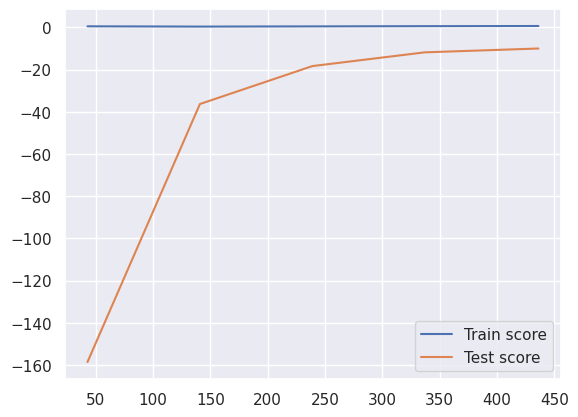

In [26]:
plot_learning_curve(Lasso(alpha=0.0001), (X, y), RANDOM_SEED)

##### <font color="white">**Elastic Net (L1+L2)**</font>

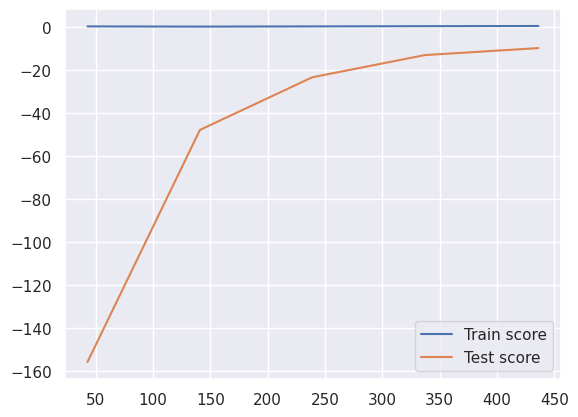

In [27]:
plot_learning_curve(ElasticNet(alpha=0.1, l1_ratio=0.1), (X, y), RANDOM_SEED)

#### <font color="green">**Visualizzazione della Distribuzione dei Residui per Valutare l'Adeguatezza del Modello**</font>

La distribuzione dei residui è stata visualizzata sul set di addestramento, al fine di valutare l’adeguatezza del modello, con l’obiettivo di identificare eventuali anomalie, come: residui non simmetrici, presenza di outliers o relazioni non lineari non catturate dal modello. Un modo comune per visualizzare i residui è tramite lo scatterplot, dove i residui vengono tracciati sull'asse y, mentre i valori previsti sull'asse x

In [28]:
def residual_model(model, dataset):

  """
  Visualizza la distribuzione dei residui per un modello di regressione Ridge, Lasso o Elastic Net

  Parametri:
    - model (object): modello di regressione Ridge, Lasso o ElasticNet, addestrato
    - dataset (tuple): tupla (X, y) contenente le features e il target del set di train

  Output: Scatterplot dei residui rispetto ai valori previsti
  """

  # estrazione delle features (X) e del target (y)
  X, y = dataset
  # predizione dei valori tramite il modello
  y_pred = model.predict(X)
  # calcolo dei residui: differenza tra valori osservati e predetti
  residual = y - y_pred

  plt.scatter(y_pred, residual)
  plt.axhline(y=0, color='r')
  plt.xlabel('Valori previsti')
  plt.ylabel('Residui')
  plt.title('Grafico dei residui')
  plt.show()

L’analisi comparativa dei grafici dei residui relativi ai modelli Ridge, Lasso ed Elastic Net evidenzia un comportamento simile: i residui si distribuiscono simmetricamente attorno allo zero, pur mostrando una lieve eteroscedasticità crescente con l’aumento dei valori previsti. Alcuni outliers sono presenti in tutti e tre i modelli, ma non ne compromettono la validità

##### <font color="white">**Ridge**</font>

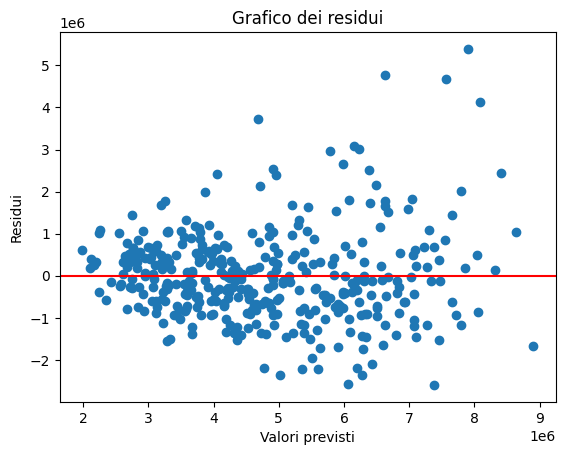

In [29]:
# istanziazione dell'oggetto ridge, della classe Ridge, con parametro di regolarizzazione pari a 10.0
ridge = Ridge(alpha=10.)
# addestramento del modello, sul set di addestramento
ridge.fit(X_train, y_train)
# invocazione della funzione residual_model, con parametri: modello, dataset con features e targets del set di train
residual_model(ridge, (X_train, y_train))

##### <font color="white">**Lasso**</font>

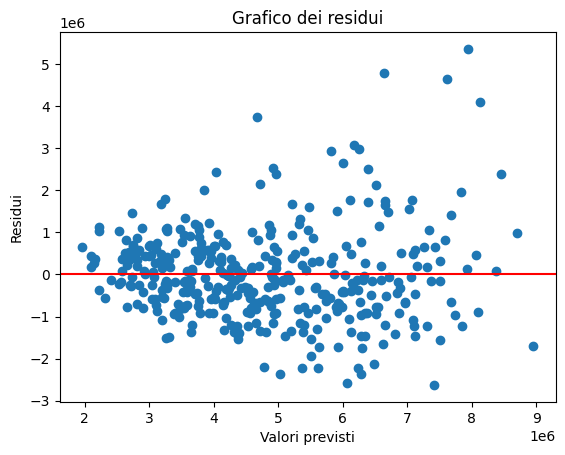

In [30]:
# istanziazione dell'oggetto lasso, della classe Lasso, con parametro di regolarizzazione pari a 0.0001
lasso = Lasso(alpha=0.0001)
# addestramento del modello, sul set di addestramento
lasso.fit(X_train, y_train)
# invocazione della funzione residual_model, con parametri: modello, dataset con features e targets del set di train
residual_model(lasso, (X_train, y_train))

##### <font color="white">**Elastic Net**</font>

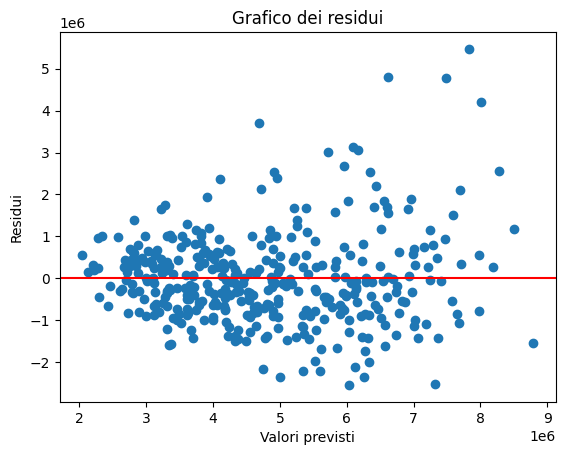

In [31]:
# istanziazione dell'oggetto elastic_net, della classe ElasticNet, con parametro di regolarizzazione pari a 0.1 e l1_ratio pari a 0.1
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.1)
# addestramento del modello, sul set di addestramento
elastic_net.fit(X_train, y_train)
# invocazione della funzione residual_model, con parametri: modello, dataset con features e targets del set di train
residual_model(elastic_net, (X_train, y_train))